# Exercise 02

## Time Series Analysis

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 02.1 Find the values of rho for which a series becomes non-stationary. rho between 0 and 1 ([0,1]) \n",
`X(t) = Rho * X(t-1) + Er(t)`

### Librerias

In [1]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
def ts(rho):
    ts = pd.Series(np.random.rand(200) - 0.5, index=pd.date_range("2020-01-01", periods=200))
    
    for i in range(1, ts.shape[0]):
        ts.iloc[i] = ts.iloc[i] + rho * ts.iloc[i-1]    
    return ts

In [3]:
result_rho = []
for r in np.arange(0, 1.1, 0.01):
    ts1 = ts(rho = r)
    result = adfuller(ts1)
        
    print('Rho:', r)
    print('p-value: %f' % result[1])

Rho: 0.0
p-value: 0.000000
Rho: 0.01
p-value: 0.000000
Rho: 0.02
p-value: 0.000000
Rho: 0.03
p-value: 0.000000
Rho: 0.04
p-value: 0.000000
Rho: 0.05
p-value: 0.000000
Rho: 0.06
p-value: 0.000000
Rho: 0.07
p-value: 0.000083
Rho: 0.08
p-value: 0.000000
Rho: 0.09
p-value: 0.000000
Rho: 0.1
p-value: 0.000000
Rho: 0.11
p-value: 0.000000
Rho: 0.12
p-value: 0.000000
Rho: 0.13
p-value: 0.000000
Rho: 0.14
p-value: 0.000000
Rho: 0.15
p-value: 0.000000
Rho: 0.16
p-value: 0.000000
Rho: 0.17
p-value: 0.000000
Rho: 0.18
p-value: 0.000000
Rho: 0.19
p-value: 0.000000
Rho: 0.2
p-value: 0.000000
Rho: 0.21
p-value: 0.000311
Rho: 0.22
p-value: 0.000000
Rho: 0.23
p-value: 0.000000
Rho: 0.24
p-value: 0.000000
Rho: 0.25
p-value: 0.000000
Rho: 0.26
p-value: 0.000000
Rho: 0.27
p-value: 0.000000
Rho: 0.28
p-value: 0.000000
Rho: 0.29
p-value: 0.000000
Rho: 0.3
p-value: 0.000000
Rho: 0.31
p-value: 0.000000
Rho: 0.32
p-value: 0.000000
Rho: 0.33
p-value: 0.000000
Rho: 0.34
p-value: 0.000000
Rho: 0.35000000000000003

El valor de Rho que hace que la serie se vuelva no estacionaria es desde 0.9 a 1.

# 02.2 Download and explore two series from google trends

In [4]:
df = pd.read_csv('multiTimeline.csv', skiprows=1)
df.head()

,Semana,compras: (Todo el mundo),desempleo: (Todo el mundo)
0,2015-06-21,82,13
1,2015-06-28,86,15
2,2015-07-05,80,14
3,2015-07-12,84,13
4,2015-07-19,83,12


In [5]:
df.columns = ['month', 'Compras', 'Desempleo']
df.head()

,month,Compras,Desempleo
0,2015-06-21,82,13
1,2015-06-28,86,15
2,2015-07-05,80,14
3,2015-07-12,84,13
4,2015-07-19,83,12


In [6]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)

df.head()

,Compras,Desempleo
month,,
2015-06-21,82,13
2015-06-28,86,15
2015-07-05,80,14
2015-07-12,84,13
2015-07-19,83,12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2015-06-21 to 2020-06-14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Compras    261 non-null    int64
 1   Desempleo  261 non-null    int64
dtypes: int64(2)
memory usage: 6.1 KB


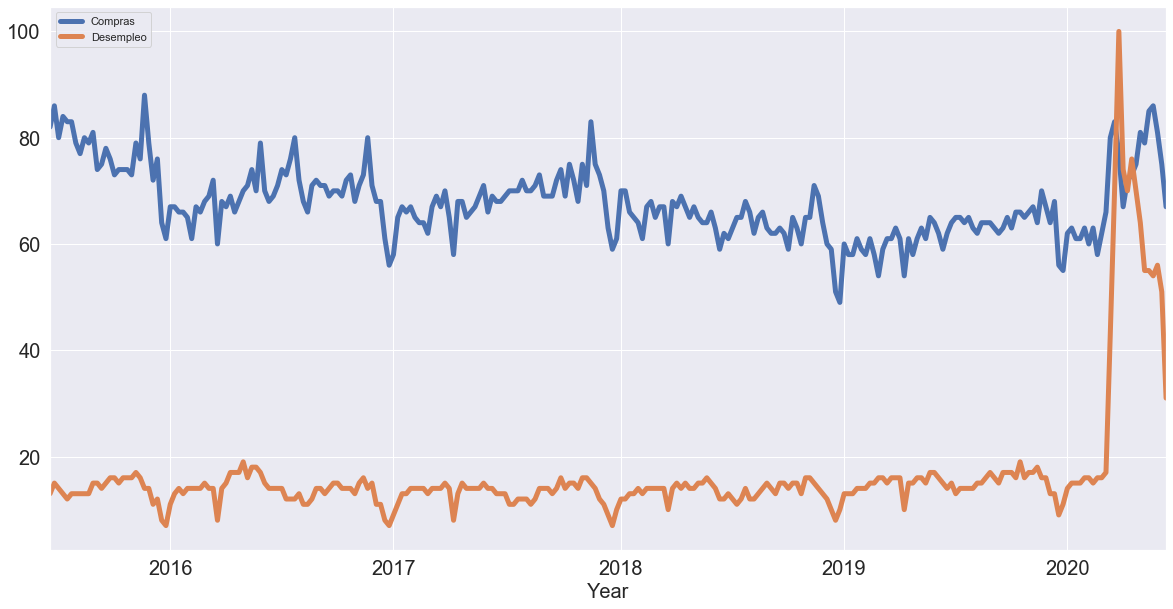

In [8]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

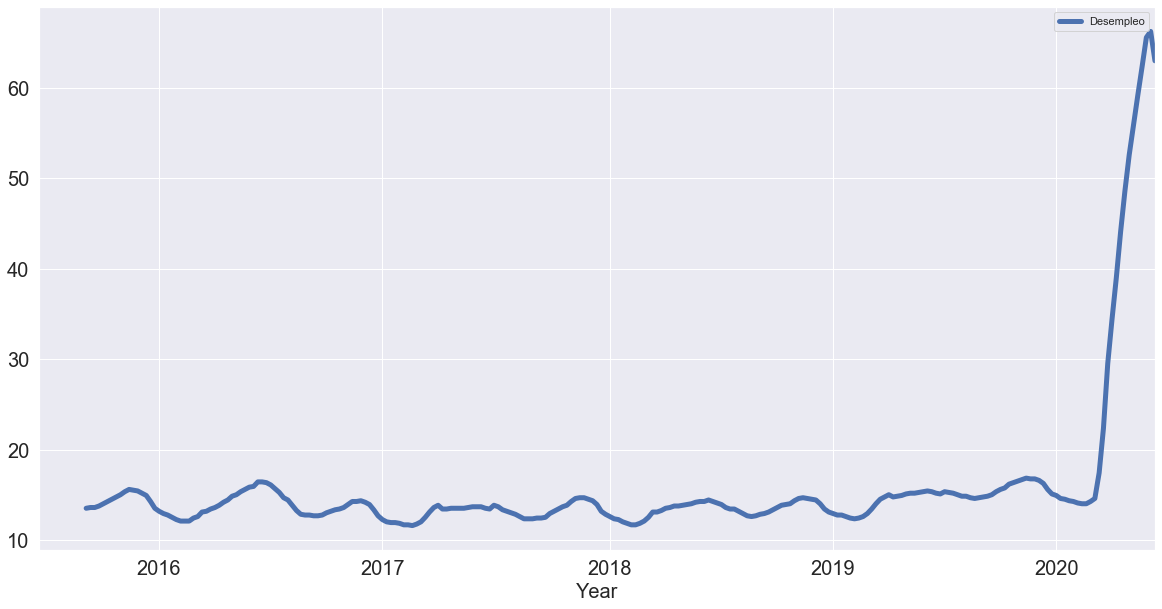

In [9]:
des = df[['Desempleo']]
des.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

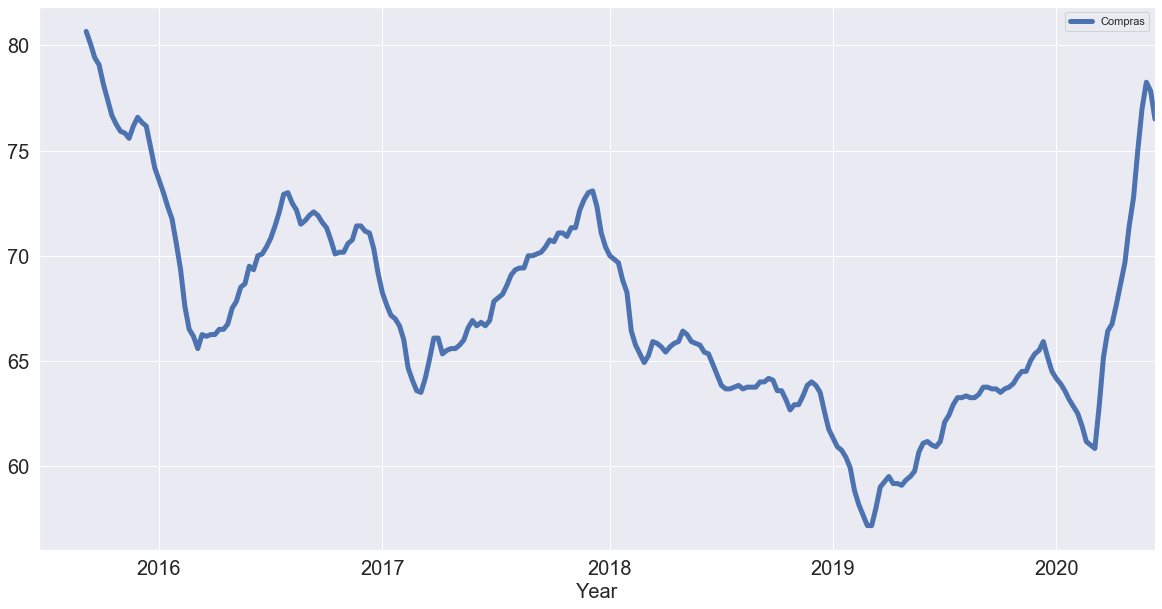

In [10]:
comp = df[['Compras']]
comp.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

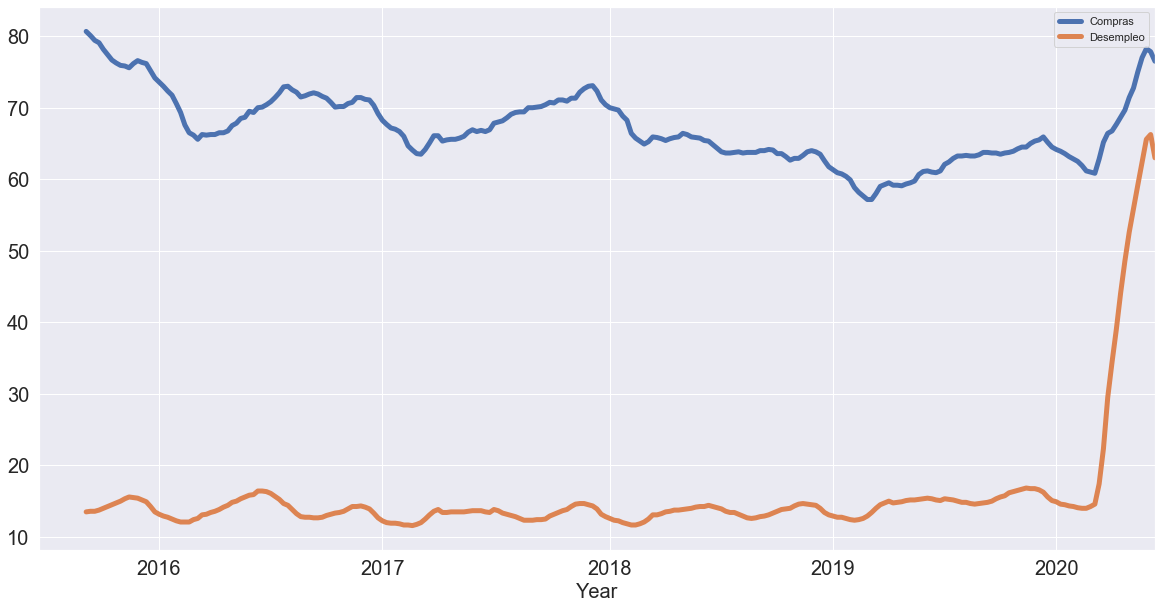

In [11]:
df[['Compras', 'Desempleo']].rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

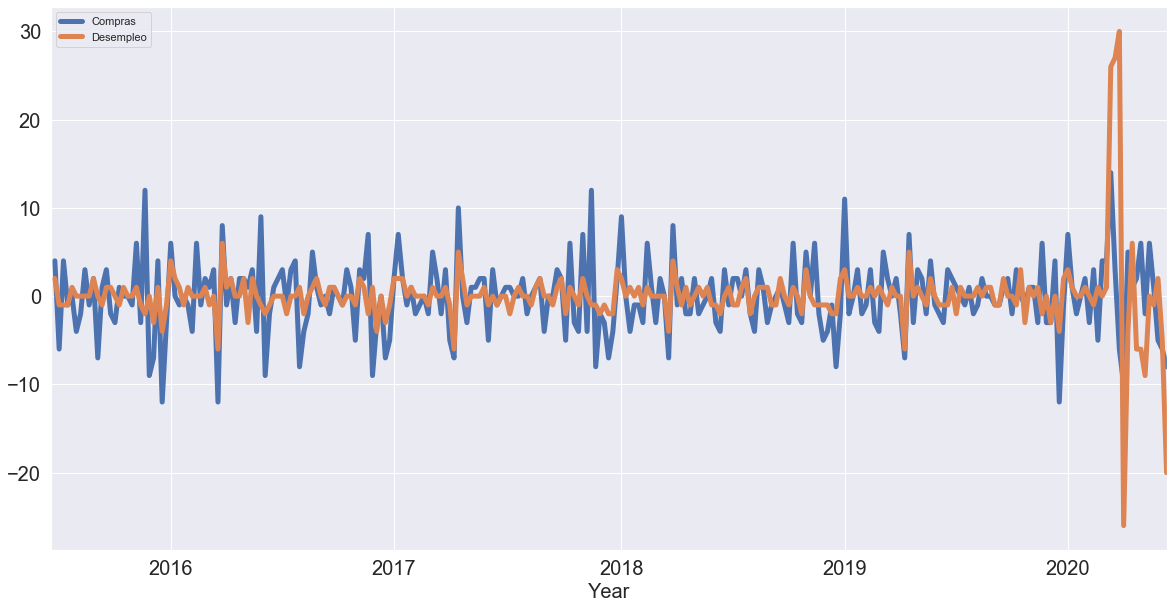

In [12]:
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [13]:
# Test Dickey Fuller sin Diferencias (la serie desempleo es no estacionaria)

result = adfuller(df['Desempleo'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Test Dickey Fuller con Diferencias (la serie desempleo es estacionaria)

result = adfuller(df['Desempleo'].diff().iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.968347
p-value: 0.764633
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
ADF Statistic: -7.185362
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


In [14]:
df.corr()

,Compras,Desempleo
Compras,1.000000,0.347123
Desempleo,0.347123,1.000000


In [15]:
df.diff().corr()

,Compras,Desempleo
Compras,1.000000,0.343606
Desempleo,0.343606,1.000000
